In [2]:
import tensorflow as tf
import numpy as np
from pandas import DataFrame as df
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style()

In [8]:
x = np.linspace(0, 50, 50) 
y = np.linspace(0, 50, 50) 
  
x += np.random.uniform(-7, 7, 50) 
y += np.random.uniform(-7, 7, 50) 
  
n = len(x)

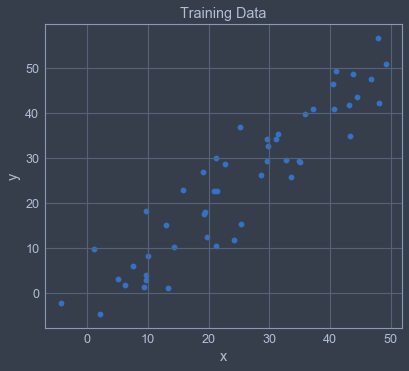

In [9]:
plt.scatter(x, y) 
plt.xlabel('x') 
plt.ylabel('y') 
plt.title("Training Data") 
plt.show()

In [12]:
X = tf.placeholder("float") 
Y = tf.placeholder("float") 
W = tf.Variable(np.random.randn(), name = "W") 
b = tf.Variable(np.random.randn(), name = "b")

Instructions for updating:
Colocations handled automatically by placer.


In [13]:
learning_rate = 0.01
training_epochs = 1000

In [14]:
# Hypothesis 
y_pred = tf.add(tf.multiply(X, W), b) 
  
# Mean Squared Error Cost Function 
cost = tf.reduce_sum(tf.pow(y_pred-Y, 2)) / (2 * n) 
  
# Gradient Descent Optimizer 
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) 
  
# Global Variables Initializer 
init = tf.global_variables_initializer()

Instructions for updating:
Use tf.cast instead.


In [16]:
# Starting the Tensorflow Session 
with tf.Session() as sess: 
      
    # Initializing the Variables 
    sess.run(init) 
      
    # Iterating through all the epochs 
    for epoch in range(training_epochs): 
          
        # Feeding each data point into the optimizer using Feed Dictionary 
        for (_x, _y) in zip(x, y): 
            sess.run(optimizer, feed_dict = {X : _x, Y : _y}) 
        
        # Displaying the result after every 50 epochs 
        if (epoch + 1) % 50 == 0: 
            # Calculating the cost a every epoch 
            c = sess.run(cost, feed_dict = {X : x, Y : y}) 
            print("Epoch", (epoch + 1), ": cost =", c, "W =", sess.run(W), "b =", sess.run(b))
            
    # Storing necessary values to be used outside the Session 
    training_cost = sess.run(cost, feed_dict ={X: x, Y: y}) 
    weight = sess.run(W) 
    bias = sess.run(b) 

Epoch 50 : cost = 21.768196 W = 1.0570217 b = 0.7879488
Epoch 100 : cost = 21.559416 W = 1.0609522 b = 0.60675126
Epoch 150 : cost = 21.378855 W = 1.0645105 b = 0.4427155
Epoch 200 : cost = 21.22231 W = 1.0677316 b = 0.29421702
Epoch 250 : cost = 21.086262 W = 1.0706477 b = 0.15978311
Epoch 300 : cost = 20.967749 W = 1.0732877 b = 0.038081605
Epoch 350 : cost = 20.86426 W = 1.0756775 b = -0.07209331
Epoch 400 : cost = 20.773695 W = 1.077841 b = -0.1718332
Epoch 450 : cost = 20.694267 W = 1.0797997 b = -0.2621264
Epoch 500 : cost = 20.624468 W = 1.0815729 b = -0.34386814
Epoch 550 : cost = 20.562983 W = 1.083178 b = -0.4178678
Epoch 600 : cost = 20.508738 W = 1.0846312 b = -0.484858
Epoch 650 : cost = 20.460781 W = 1.0859467 b = -0.54550296
Epoch 700 : cost = 20.41831 W = 1.0871376 b = -0.60040426
Epoch 750 : cost = 20.380634 W = 1.0882157 b = -0.6501084
Epoch 800 : cost = 20.347164 W = 1.0891918 b = -0.69510466
Epoch 850 : cost = 20.317387 W = 1.0900754 b = -0.7358385
Epoch 900 : cost 

In [19]:
predictions = weight * x + bias

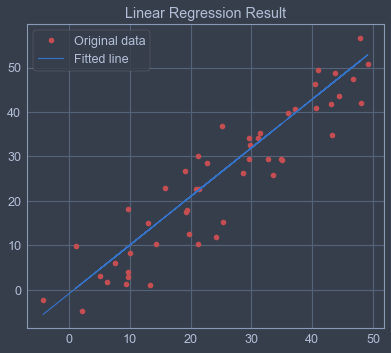

In [20]:
plt.plot(x, y, 'ro', label ='Original data') 
plt.plot(x, predictions, label ='Fitted line') 
plt.title('Linear Regression Result') 
plt.legend() 
plt.show() 